<a href="https://colab.research.google.com/github/aem226/Reinforcement-Learning-Projects/blob/main/lab3_td_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 3: Temporal Difference Learning

In this lab, we will practice TD Learning methods, including SARSA and Q-Learning. Both are tabular methods that work on finite MDP.

We will solve the cliff problem: https://gymnasium.farama.org/environments/toy_text/cliff_walking/#is_slippy


The following code runs in colab, if you want to see the animation, you have to run it using python locally on your computer and replacing render_mode="ansi" for render_mode="human".

Thef follwing code runs the cliff problem using a random policy.

In [ ]:
import gymnasium as gym

# Create the environment
env = gym.make("CliffWalking-v1", render_mode="ansi")

n_episodes = 5      # number of episodes to run
max_steps = 100     # safety cap

for episode in range(n_episodes):
    state, info = env.reset()
    done = False
    total_reward = 0

    for step in range(max_steps):
        # Random policy: sample an action uniformly
        action = env.action_space.sample()

        next_state, reward, terminated, truncated, info = env.step(action)
        total_reward += reward
        state = next_state

        if terminated or truncated:
            break

    print(f"Episode {episode+1}: total reward = {total_reward}")

env.close()

Episode 1: total reward = -1486
Episode 2: total reward = -1486
Episode 3: total reward = -793
Episode 4: total reward = -496
Episode 5: total reward = -496


## Exercise 1: SARSA
Implement SARSA to solve the cliff problem above. Recommendations:



1. Define your Q table, as a matrix of [number of states] x [number of actions]
2. Greedy policy: Write a function that receives a state, the Q table, and returns the best action (the one with the maximum Q value).
3. $\epsilon$-greedy: Wreite a function that chooses the greedy policy with $\epsilon$ probality, and chooses a random actions with 1-$\epsilon$ probability.
4. Implement the SARSA algorithm based on the pseudo-code



In [ ]:

import gymnasium as gym
import numpy as np

# Create the environment
env = gym.make("CliffWalking-v1", render_mode="ansi")
n_states = env.observation_space.n     # total number of states
n_actions = env.action_space.n         # total number of actions

# Defining the Q table, as a matrix of  [number of states] x [number of actions]
Q = np.zeros((n_states, n_actions))
# Greedy policy: Writing a function that recieves a state, the Q table, and returns the best action (max Q table)
def greedy_policy(state, Q): #recieving the state and Q functio
  return np.argmax(Q[state])  #returning the best action (the max Q table)
#ϵ -greedy: Write a function that chooses the greedy policy with  ϵ  probality, and chooses a random actions with 1- ϵ  probability.
def epsilon_greedy_policy(state, Q, epsilon, n_actions):
    if np.random.random() < epsilon:
        # Explore: choose random action
        return np.random.randint(n_actions)
    else:
        # Exploit: choose greedy action
        return np.argmax(Q[state])

alpha = 0.1
gamma = 0.99
epsilon = 0.1
n_episodes = 1000 # number of episodes to run
max_steps = 100     # safety cap

for episode in range(n_episodes):
    state, info = env.reset()
    action = epsilon_greedy_policy(state, Q, epsilon, n_actions)

    done = False
    total_reward = 0

    while not done:
        next_state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated

        # pick next action (A') using epsilon-greedy
        next_action = epsilon_greedy_policy(next_state, Q, epsilon, n_actions)

        # SARSA update rule
        Q[state, action] += alpha * (
            reward + gamma * Q[next_state, next_action] - Q[state, action]
        )

        # move forward
        state = next_state
        action = next_action
        total_reward += reward


    print(f"Episode {episode+1}: total reward = {total_reward}")

# Q-learning parameters
learning_rate = 0.1
discount_factor = 0.99
n_actions = env.action_space.n
n_states = env.observation_space.n
Q = np.zeros((n_states, n_actions))



Episode 1: total reward = -107
Episode 2: total reward = -2578
Episode 3: total reward = -754
Episode 4: total reward = -302
Episode 5: total reward = -118
Episode 6: total reward = -112
Episode 7: total reward = -258
Episode 8: total reward = -366
Episode 9: total reward = -88
Episode 10: total reward = -425
Episode 11: total reward = -259
Episode 12: total reward = -45
Episode 13: total reward = -369
Episode 14: total reward = -59
Episode 15: total reward = -53
Episode 16: total reward = -198
Episode 17: total reward = -529
Episode 18: total reward = -99
Episode 19: total reward = -80
Episode 20: total reward = -73
Episode 21: total reward = -150
Episode 22: total reward = -141
Episode 23: total reward = -199
Episode 24: total reward = -82
Episode 25: total reward = -216
Episode 26: total reward = -325
Episode 27: total reward = -30
Episode 28: total reward = -137
Episode 29: total reward = -98
Episode 30: total reward = -55
Episode 31: total reward = -97
Episode 32: total reward = -

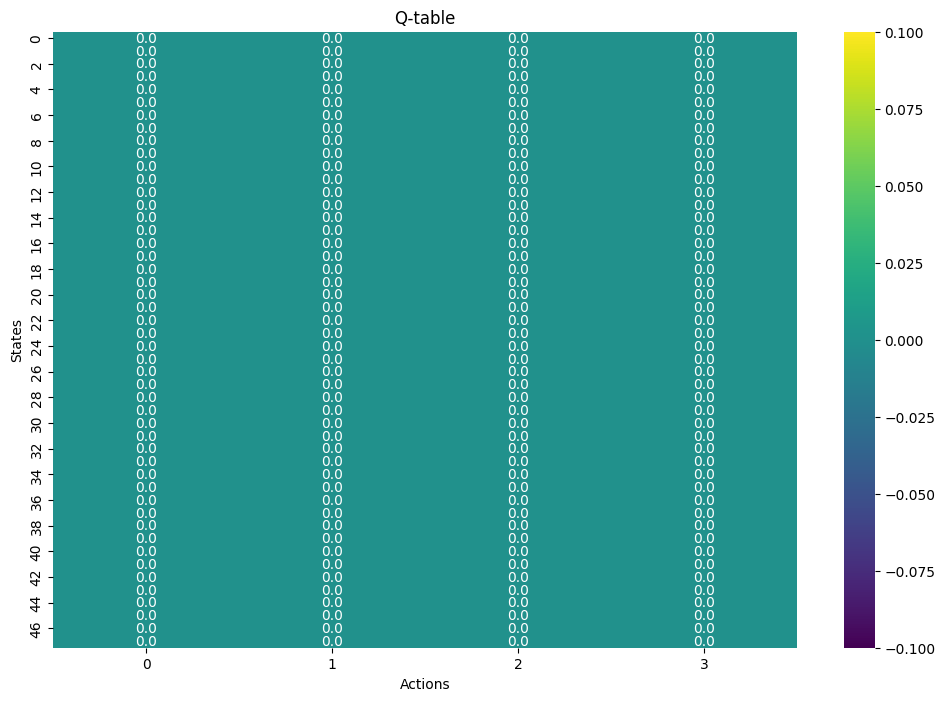

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt



def plot_Q(Q):
  plt.figure(figsize=(12, 8))
  sns.heatmap(Q, annot=True, fmt=".1f", cmap="viridis")
  plt.xlabel("Actions")
  plt.ylabel("States")
  plt.title("Q-table")
  plt.show()

plot_Q(Q)

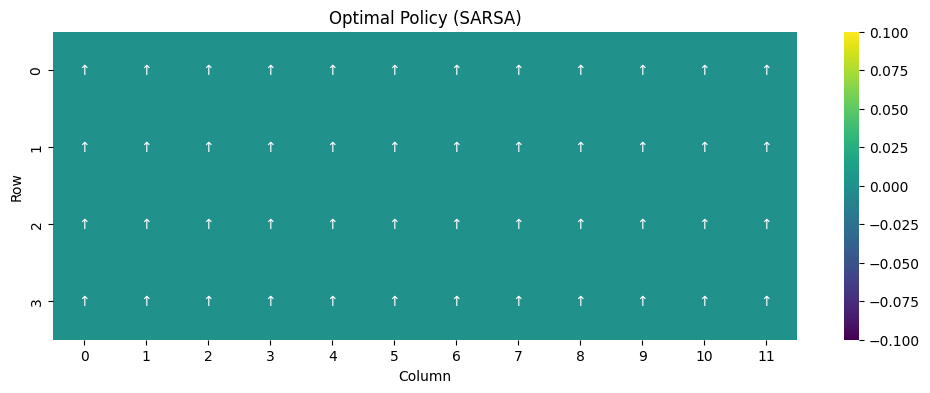

In [ ]:
def plot_policy(Q, title="SARSA"):
  # Reshape Q table to a 4x12 grid
  Q_grid = Q.reshape((4, 12, n_actions))

  # Get the optimal action for each state and its corresponding Q-value
  optimal_action = np.argmax(Q_grid, axis=2)
  optimal_policy_Q = np.max(Q_grid, axis=2)


  # Define arrow mapping based on action space (0: up, 1: right, 2: down, 3: left)
  action_arrows = {0: "↑", 1: "→", 2: "↓", 3: "←"}
  optimal_policy_arrows = np.vectorize(action_arrows.get)(optimal_action)


  plt.figure(figsize=(12, 4))
  sns.heatmap(optimal_policy_Q, annot=optimal_policy_arrows, fmt="", cmap="viridis", cbar=True) # Add color bar back
  plt.xlabel("Column")
  plt.ylabel("Row")
  plt.title("Optimal Policy (SARSA)")
  plt.show()
plot_policy(Q)

## Exercise 2.1: Q: Learning
Implement Q-learning method to solve the cliff problem

In [16]:
import gymnasium as gym
import numpy as np

# Create the environment
env = gym.make("CliffWalking-v1", render_mode="ansi")
n_states = env.observation_space.n     # total number of states
n_actions = env.action_space.n         # total number of actions

# Defining the Q table, as a matrix of  [number of states] x [number of actions]
Q = np.zeros((n_states, n_actions))
# Greedy policy: Writing a function that recieves a state, the Q table, and returns the best action (max Q table)
def greedy_policy(state, Q): #recieving the state and Q functio
  return np.argmax(Q[state])  #returning the best action (the max Q table)
#ϵ -greedy: Write a function that chooses the greedy policy with  ϵ  probality, and chooses a random actions with 1- ϵ  probability.
def epsilon_greedy_policy(state, Q, epsilon, n_actions):
    if np.random.random() < epsilon:
        # Explore: choose random action
        return np.random.randint(n_actions)
    else:
        # Exploit: choose greedy action
        return np.argmax(Q[state])

alpha = 0.1
gamma = 0.99
epsilon = 0.1
n_episodes = 1000 # number of episodes to run
max_steps = 100     # safety cap

for episode in range(n_episodes):
    state, info = env.reset()
    action = epsilon_greedy_policy(state, Q, epsilon, n_actions)

    done = False
    total_reward = 0

    while not done:
        next_state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated

        # pick next action (A') using epsilon-greedy
        next_action = epsilon_greedy_policy(next_state, Q, epsilon, n_actions)

        # Q - Learning  (Change this code)
        Q[state, action] += alpha * (
            reward + gamma * Q[next_state, next_action] - Q[state, action]
        )

        # move forward
        state = next_state
        action = next_action
        total_reward += reward


    print(f"Episode {episode+1}: total reward = {total_reward}")

# Q-learning parameters
learning_rate = 0.1
discount_factor = 0.99
n_actions = env.action_space.n
n_states = env.observation_space.n
Q = np.zeros((n_states, n_actions))


Episode 1: total reward = -56
Episode 2: total reward = -2331
Episode 3: total reward = -1226
Episode 4: total reward = -408
Episode 5: total reward = -180
Episode 6: total reward = -42
Episode 7: total reward = -638
Episode 8: total reward = -192
Episode 9: total reward = -375
Episode 10: total reward = -382
Episode 11: total reward = -77
Episode 12: total reward = -33
Episode 13: total reward = -377
Episode 14: total reward = -317
Episode 15: total reward = -87
Episode 16: total reward = -232
Episode 17: total reward = -69
Episode 18: total reward = -211
Episode 19: total reward = -506
Episode 20: total reward = -196
Episode 21: total reward = -106
Episode 22: total reward = -109
Episode 23: total reward = -341
Episode 24: total reward = -72
Episode 25: total reward = -101
Episode 26: total reward = -73
Episode 27: total reward = -45
Episode 28: total reward = -46
Episode 29: total reward = -238
Episode 30: total reward = -38
Episode 31: total reward = -93
Episode 32: total reward = 

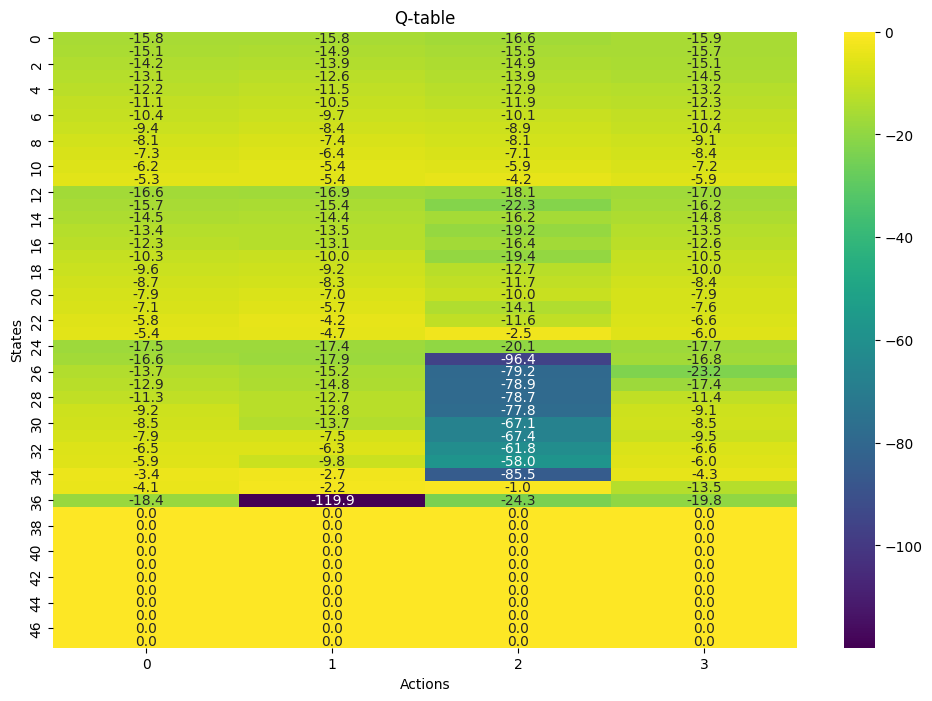

In [ ]:
plot_Q(Q)

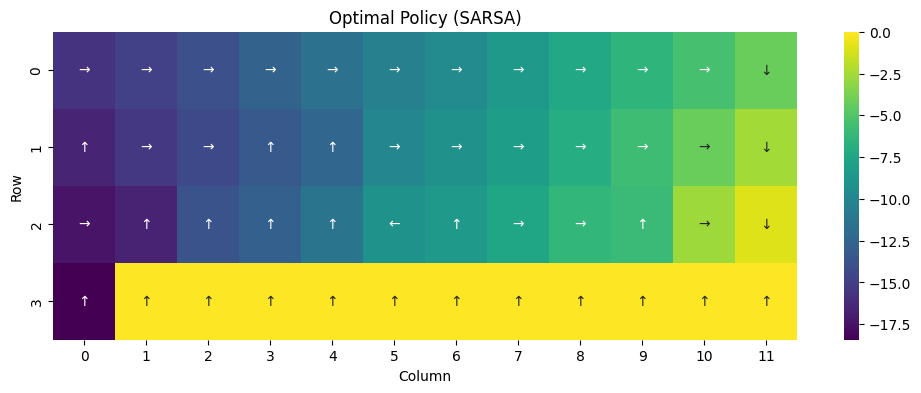

In [ ]:
plot_policy(Q, "Q-Learning")

## Exercise 2.2: SARSA vs Q-learning
 1. Compare the results betwen SARSA and Q-Learning (plot a graph of the sum of rewards duing each episode for each algorithm).
 2. Include the is_slippery=True parameter. Compare again, which one is better?


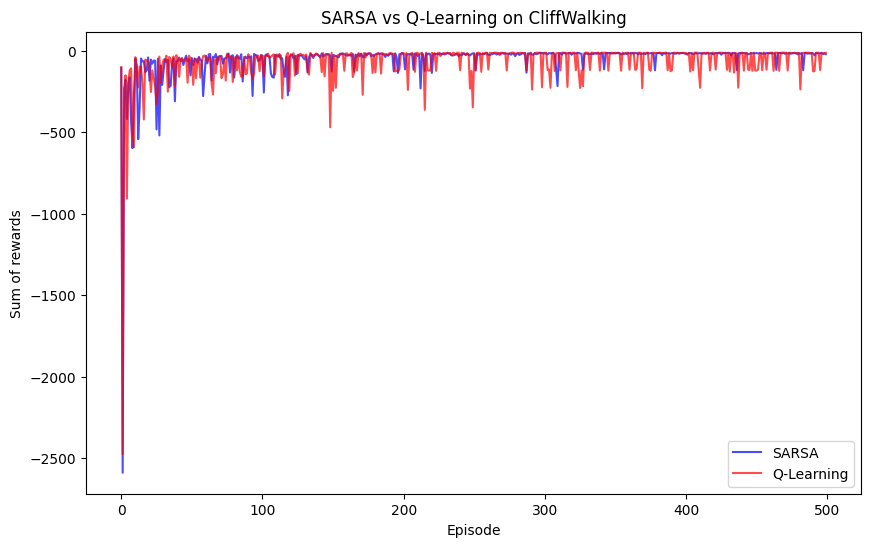

In [17]:
# 1.
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(sarsa_rewards, label="SARSA", color="blue", alpha=0.7)
plt.plot(q_rewards, label="Q-Learning", color="red", alpha=0.7)

plt.xlabel("Episode")
plt.ylabel("Sum of rewards")
plt.title("SARSA vs Q-Learning on CliffWalking")
plt.legend()
plt.show()

# Exercise 3 (graduate students): 8x8 grid problem
Solve the 8x8 grid problem from the previous lab. You can use SARSA or Q-learning. How many episodes does it need to learn the optimal policy?


In [18]:
#2
import gymnasium as gym

# Stochastic environment
env = gym.make("FrozenLake-v1", is_slippery=True)

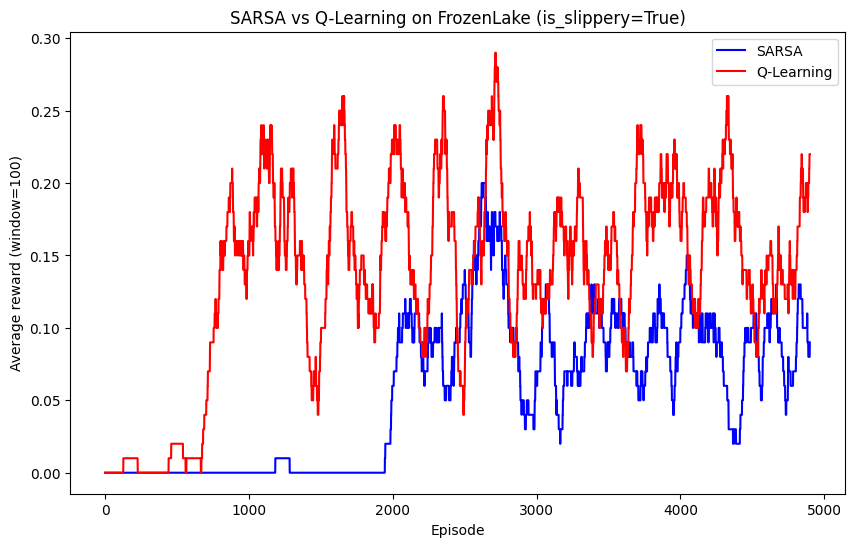

In [21]:
# Run longer training
sarsa_rewards_slip = run_sarsa(env, n_episodes=5000, alpha=0.5, gamma=0.99, epsilon=0.2)
q_rewards_slip = run_q_learning(env, n_episodes=5000, alpha=0.5, gamma=0.99, epsilon=0.2)

# Moving average to smooth
def moving_average(data, window=100):
    return np.convolve(data, np.ones(window)/window, mode="valid")

plt.figure(figsize=(10,6))
plt.plot(moving_average(sarsa_rewards_slip), label="SARSA", color="blue")
plt.plot(moving_average(q_rewards_slip), label="Q-Learning", color="red")
plt.xlabel("Episode")
plt.ylabel("Average reward (window=100)")
plt.title("SARSA vs Q-Learning on FrozenLake (is_slippery=True)")
plt.legend()
plt.show()
